In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values


$${ x }_{ new }=\frac { x-\mu  }{ \sigma  } $$

In [3]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

이번에는 표준화(standardization)을 적용한 데이터와 적용하지 않은 데이터의 covariance matrix를 비교해보자. 

$$ { \sigma  }_{ jk }=\frac { 1 }{ n-1 } \sum _{ i=1 }^{ n }{ ({ x }_{ ij }-\bar { x } _{ j })({ x }_{ ik }-{ \bar { x }  }_{ k }) } $$

In [13]:
mean_vec = np.mean(X, axis=0)
cov_mat2 = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1)
print("표준화 적용 X \n", cov_mat2)

mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print("표준화 적용 \n", cov_mat)


표준화 적용 X 
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]
표준화 적용 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [9]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [14]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print("eig_values \n{}".format(eig_vals))
print("eig_vectors \n{}".format(eig_vecs))

eig_values 
[ 2.93035378  0.92740362  0.14834223  0.02074601]
eig_vectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


표준화(standardization)을 한 경우, correlation matrix와 같은 결과값이 나온다.

In [15]:
cor_mat = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eigh(cor_mat)

print("eig_values \n{}".format(eig_vals))
print("eig_vectors \n{}".format(eig_vecs))

eig_values 
[ 2.91081808  0.92122093  0.14735328  0.02060771]
eig_vectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Singular Vector Decomposition을 돌려보아도 u와 같은 결과가 나온다.

In [16]:
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

### PC 선택하기

In [92]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
eig_pairs

[(2.9108180837520523,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.92122093070722455,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14735327830509562,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020607707235624929,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [93]:
eig_pairs[0][1]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [94]:
eig_vecs[0]

array([ 0.52237162, -0.37231836, -0.72101681,  0.26199559])

In [22]:
print("eigen value 내림차순으로 정렬")
for i in eig_pairs:
    print(i[0])

eigen value 내림차순으로 정렬
2.91081808375
0.921220930707
0.147353278305
0.0206077072356


In [17]:
total = sum(eig_vals)

[72.770452093801353, 23.030523267680632, 3.6838319576273935, 0.51519268089062353]
[  72.77045209   95.80097536   99.48480732  100.        ]


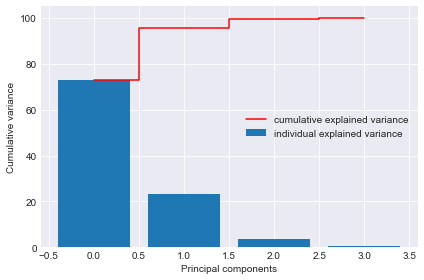

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
explained_var = [(i/total) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var = np.cumsum(explained_var)
print(explained_var)
print(cum_var)

with plt.style.context('seaborn-darkgrid'):
    plt.bar(range(len(explained_var)), explained_var, align='center',
            label='individual explained variance')
    plt.step(range(len(explained_var)), cum_var, where='mid',
             label='cumulative explained variance', color="red")
    plt.ylabel("Cumulative variance")
    plt.xlabel("Principal components")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

### 새로운 피쳐스페이스로 투영하는 projection matrix를 만들어보자

In [64]:
pc = 2
projection_matrix  = np.hstack((eig_pairs[i][1].reshape(len(eig_vals),1)) for i in range(pc))

In [65]:
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [69]:
Y = X_std.dot(projection_matrix)

In [193]:
np.shape(Y)

(150, 2)

In [197]:
Y

array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -

In [78]:
label = df['class'].unique()

In [202]:
label

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

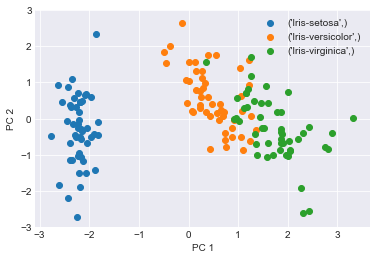

In [218]:
with plt.style.context("seaborn-darkgrid"):
    for l in zip(label):
        plt.scatter(Y[y==l,0], Y[y==l,1],
                    label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

## scikit-learn패키지를 이용하여 구해보기

In [83]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
Y_ = pca.fit_transform(X_std)

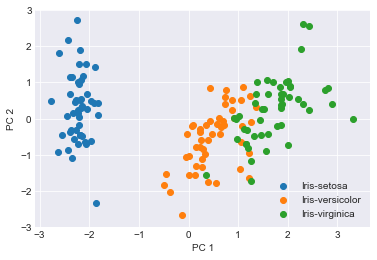

In [220]:
label = np.unique(label)
with plt.style.context("seaborn-darkgrid"):  
    for l in label:
        plt.scatter(Y_[y==l,0], Y_[y==l,1],label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show() 

In [20]:
class PCA_jay:
    def __init__(self, input_data, label=0):
        self.data = input_data
        self.label = label
    
    def eigen(self):
        self.X_std = (self.data - np.mean(self.data, axis=0)) / np.std(self.data, axis=0)
        mean_vec = np.mean(self.X_std, axis=0)
        cov_mat = (self.X_std - mean_vec).T.dot((self.X_std - mean_vec)) / (self.X_std.shape[0]-1)
        self.eig_vals, self.eig_vecs = np.linalg.eig(cov_mat)
        return self.eig_vals, self.eig_vecs
    
    def projection(self, n_components=2):
        eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:,i]) for i in range(len(self.eig_vals))]
        eig_pairs.sort(key = lambda x: x[0], reverse=True)
        projection_matrix  = np.hstack((eig_pairs[i][1].reshape(len(self.eig_vals),1)) for i in range(n_components))
        self.Y = self.X_std.dot(projection_matrix)
        return self.Y
    
    def scree_plot(self):
        total = sum(self.eig_vals)
        explained_var = [(i/total) * 100 for i in sorted(self.eig_vals, reverse=True)]
        cum_var = np.cumsum(explained_var)

        with plt.style.context('seaborn-darkgrid'):
            
            plt.bar(range(len(explained_var)), explained_var, align='center',
                    label='individual explained variance')
            plt.step(range(len(explained_var)), cum_var, where='mid',
                     label='cumulative explained variance',color = "red")
            plt.ylabel("Cumulative variance")
            plt.xlabel("Principal components")
            plt.tight_layout()
            plt.legend(loc='best')
            plt.show()
            
    def pca_plot(self):
        label = np.unique(self.label)
        with plt.style.context("seaborn-darkgrid"):  
            for l in label:
                plt.scatter(self.Y[y==l,0], self.Y[y==l,1],label=l)
            plt.xlabel("PC 1")
            plt.ylabel("PC 2")
            plt.legend()
            plt.show() 

        

In [21]:
test = PCA_jay(input_data=X, label=y)

In [22]:
eigen_values, eigen_vectors = test.eigen()
print("Eigen values \n {}".format(eigen_values))
print("Eigen vectors \n {}".format(eigen_vectors))

Eigen values 
 [ 2.93035378  0.92740362  0.14834223  0.02074601]
Eigen vectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [23]:
projection = test.projection(n_components=2)
print("Projected values \n {}".format(projection))

Projected values 
 [[ -2.26454173e+00  -5.05703903e-01]
 [ -2.08642550e+00   6.55404729e-01]
 [ -2.36795045e+00   3.18477311e-01]
 [ -2.30419716e+00   5.75367713e-01]
 [ -2.38877749e+00  -6.74767397e-01]
 [ -2.07053681e+00  -1.51854856e+00]
 [ -2.44571134e+00  -7.45626750e-02]
 [ -2.23384186e+00  -2.47613932e-01]
 [ -2.34195768e+00   1.09514636e+00]
 [ -2.18867576e+00   4.48629048e-01]
 [ -2.16348656e+00  -1.07059558e+00]
 [ -2.32737775e+00  -1.58587455e-01]
 [ -2.22408272e+00   7.09118158e-01]
 [ -2.63971626e+00   9.38281982e-01]
 [ -2.19229151e+00  -1.88997851e+00]
 [ -2.25146521e+00  -2.72237108e+00]
 [ -2.20275048e+00  -1.51375028e+00]
 [ -2.19017916e+00  -5.14304308e-01]
 [ -1.89407429e+00  -1.43111071e+00]
 [ -2.33994907e+00  -1.15803343e+00]
 [ -1.91455639e+00  -4.30465163e-01]
 [ -2.20464540e+00  -9.52457317e-01]
 [ -2.77416979e+00  -4.89517027e-01]
 [ -1.82041156e+00  -1.06750793e-01]
 [ -2.22821750e+00  -1.62186163e-01]
 [ -1.95702401e+00   6.07892567e-01]
 [ -2.05206331e+00 

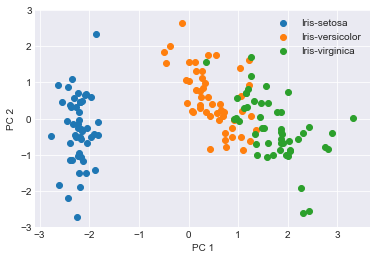

In [24]:
test.pca_plot()

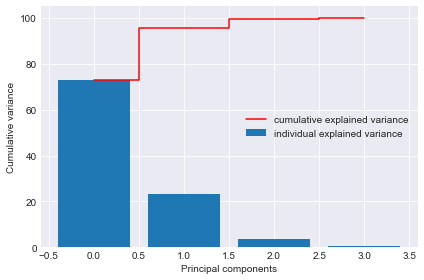

In [25]:
test.scree_plot()